In [1]:
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import albumentations as A
import matplotlib.pyplot as plt
import cv2 
A.__version__

/tmp/ipykernel_2923125/881762407.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


'1.2.0'

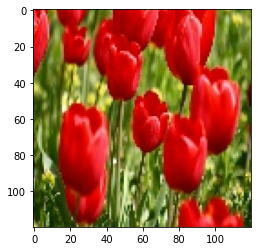

In [4]:
IMG = cv2.imread('ref_image.jpg')
plt.imshow(IMG)
plt.show()

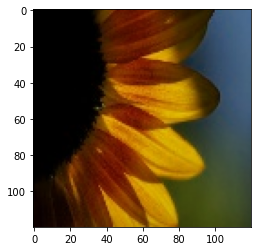

In [56]:
REF_IMG = cv2.imread('ref_image_2.jpg')
plt.imshow(REF_IMG)
plt.show()

In [6]:
def trans(transformer):
    transform = transformer
    augmented_image = transform(image=IMG)['image']
    label = str(transformer).split('(')[0]
    return augmented_image , label

def make_grid(transformer ):
    img , label = trans(transformer)
    fit , ax = plt.subplots(1 , 2 , figsize = ( 10 , 5 ))
    ax[0].imshow(IMG)
    ax[0].set_title('Original')
    ax[1].imshow(img)
    ax[1].set_title(label)
    plt.show()

In [75]:
pixel_level = 'AdvancedBlur,Blur,CLAHE,ChannelDropout,ChannelShuffle,ColorJitter,Downscale,Emboss,Equalize,FDA,FancyPCA,FromFloat,GaussNoise,GaussianBlur,GlassBlur,HistogramMatching,HueSaturationValue,ISONoise,ImageCompression,InvertImg,MedianBlur,MotionBlur,MultiplicativeNoise,Normalize,PixelDistributionAdaptation,Posterize,RGBShift,RandomBrightnessContrast,RandomFog,RandomGamma,RandomRain,RandomShadow,RandomSnow,RandomSunFlare,RandomToneCurve,RingingOvershoot,Sharpen,Solarize,Superpixels,TemplateTransform,ToFloat,ToGray,ToSepia,UnsharpMask'
pixel_level = pixel_level.split(',')
spatial_level = 'Affine,CenterCrop,CoarseDropout,Crop,CropAndPad,CropNonEmptyMaskIfExists,ElasticTransform,Flip,GridDistortion,GridDropout,HorizontalFlip,Lambda,LongestMaxSize,MaskDropout,NoOp,OpticalDistortion,PadIfNeeded,Perspective,PiecewiseAffine,PixelDropout,RandomCrop,RandomCropNearBBox,RandomGridShuffle,RandomResizedCrop,RandomRotate90,RandomScale,RandomSizedBBoxSafeCrop,RandomSizedCrop,Resize,Rotate,SafeRotate,ShiftScaleRotate,SmallestMaxSize,Transpose,VerticalFlip'
spatial_level = spatial_level.split(',')

In [76]:
other_pixel = ['FDA' , 'HistogramMatching' , 'PixelDistributionAdaptation' ,'TemplateTransform']

In [77]:
len(pixel_level)

44

In [78]:
IMG

array([[[255,  84,  77],
        [182,   2,   0],
        [183,   0,   0],
        ...,
        [110, 136,  42],
        [120, 144,  44],
        [104, 126,  24]],

       [[255,  72,  71],
        [214,  26,  25],
        [189,   3,   3],
        ...,
        [127, 151,  56],
        [121, 143,  41],
        [111, 133,  27]],

       [[255,  63,  72],
        [255,  57,  64],
        [187,   0,   0],
        ...,
        [133, 153,  54],
        [125, 145,  38],
        [120, 142,  30]],

       ...,

       [[146, 154,  67],
        [103, 113,  37],
        [ 55,  66,  16],
        ...,
        [ 21,  49,   0],
        [ 20,  46,   0],
        [ 39,  65,  17]],

       [[190, 198,  91],
        [145, 154,  64],
        [109, 118,  62],
        ...,
        [ 18,  46,   0],
        [ 27,  51,   3],
        [ 28,  51,   6]],

       [[209, 218, 101],
        [215, 224, 127],
        [137, 143,  86],
        ...,
        [ 34,  61,  11],
        [ 24,  46,   0],
        [ 25,  46,   1]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/user304/anaconda3/lib/python3.9/site-packages/albumentations/augmentations/functional.py:1855: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


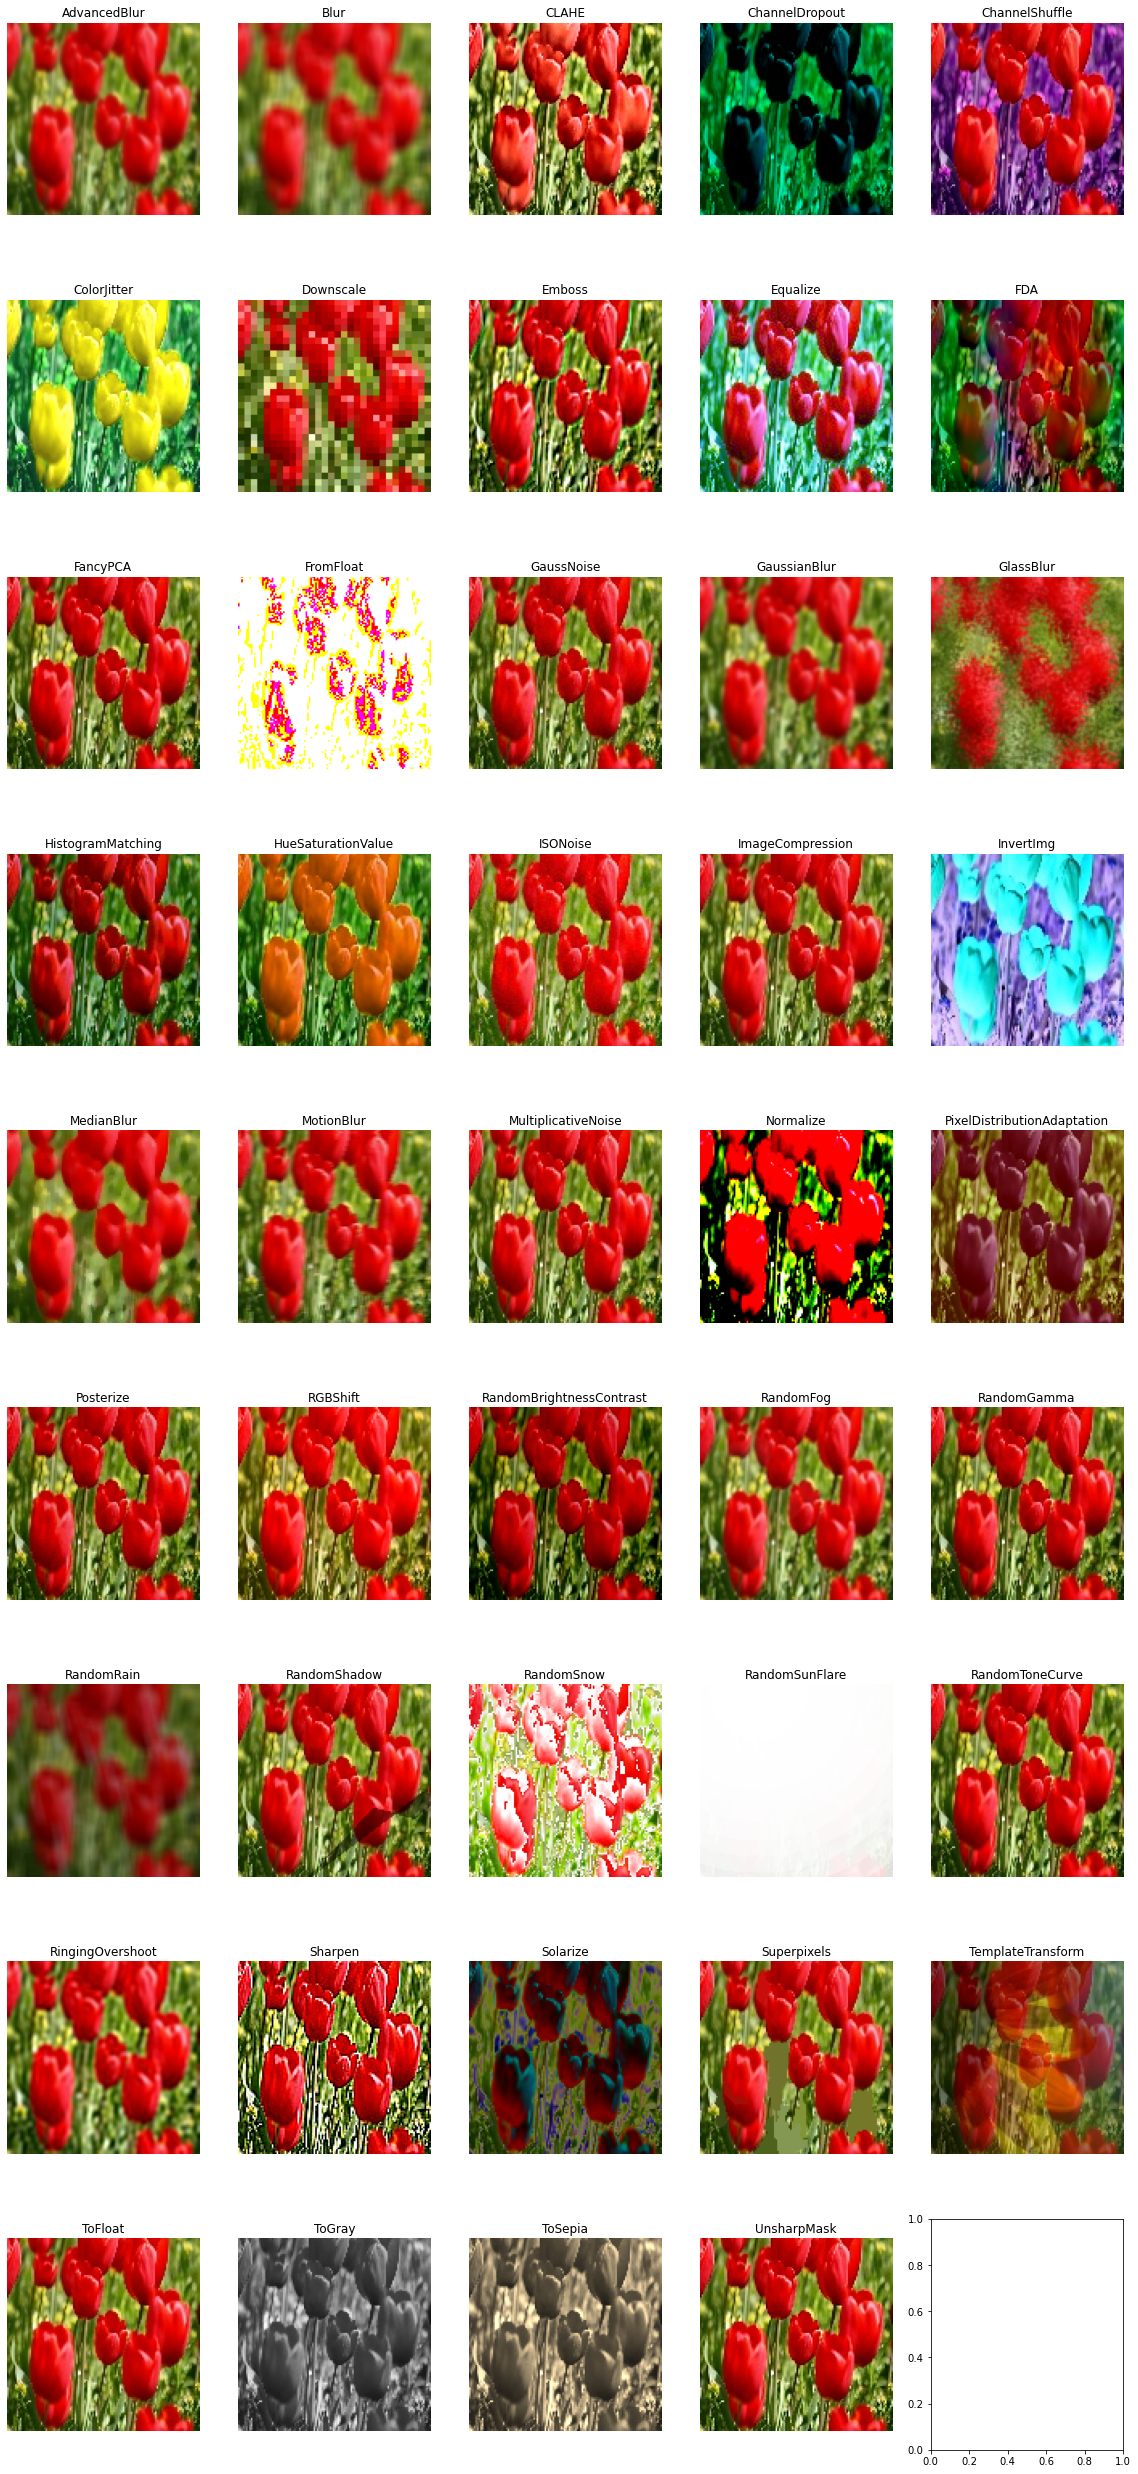

In [80]:
fig , ax = plt.subplots(9, 5, figsize = ( 20 , 45))
c = 0
x = 1
for i in range(9):
    for j in range(5):
        if pixel_level[c] == 'TemplateTransform':
            aug = A.Compose([A.TemplateTransform(REF_IMG , always_apply = True)])
            img = aug(image=IMG)['image']
#             img = img['image'].astype('float')
            ax[i, j].set_title('TemplateTransform')
            ax[i, j ].axis('off')
            ax[i, j ].imshow(img)
            c += 1 
        elif pixel_level[c] in other_pixel:
            transformer = getattr(A , pixel_level[c])([REF_IMG], p=1, read_fn=lambda x: x)
            img , label = trans(transformer)
            ax[i, j].set_title(label)
            ax[i, j ].axis('off')
            ax[i, j ].imshow(img)
            c +=1
        else:
            transformer = getattr(A , pixel_level[c])(always_apply = True)
            img , label = trans(transformer)
            ax[i, j].set_title(label)
            ax[i, j ].axis('off')
            ax[i, j ].imshow(img)
            c +=1
        if c == 44:
            break
plt.show()